In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import *

In [4]:
class LRScheduler:
    def __init__(self, lr):
        self.lr = lr
    def step(self):
        return lr
        
class ConstLRScheduler(LRScheduler):
    pass

class ExpLRScheduler:
    def __init__(self, lr, period, gamma):
        self.lr = lr
        self.period = period
        self.gamma = gamma
        self.step_count = 0
    def step(self):
        self.step_count += 1
        if (self.step_count % self.period == 0):
            self.step_count = 0
            self.lr *= self.gamma
        return self.lr
    
scheduler = ExpLRScheduler(0.01, 1, 2)
for _ in range(10):
    scheduler.step()
    print(scheduler.lr)

0.02
0.04
0.08
0.16
0.32
0.64
1.28
2.56
5.12
10.24


In [5]:
functions = [
    lambda x: 25 * x ** 2 + 10 *x,
    lambda x: x * sin(x ** 2),
    lambda x: 10 * x ** 2 + 8 * x - 25
]

derivatives = [
    lambda x: 50 * x + 10,
    lambda x: sin(x ** 2) + 2 * x ** 2 * cos(x ** 2),
    lambda x: 20 * x + 8
]

function_names = [
    '25x^2 + 10x',
    'x * sin(x^2)',
    '10x^2 + 8x - 25'
]

initial_point = 0.5467

## Задание 1. Реализуйте градиентный спуск с постоянным шагом. Исследуйте сходимость при различных значениях шага
Для этого задания были реализованы классы GradientDescent, ConstLRScheduler. 

Processing function 25x^2 + 10x
lr=0.001, minimum=-0.2, iter count=207


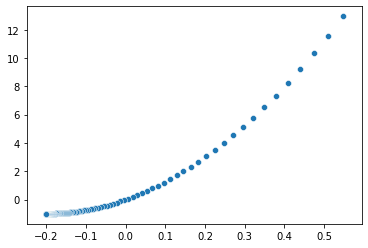

lr=0.005, minimum=-0.2, iter count=44


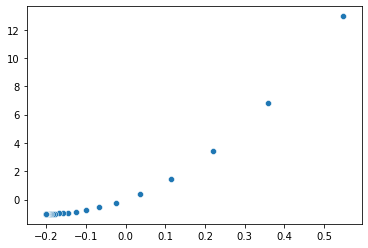

lr=0.01, minimum=-0.2, iter count=20


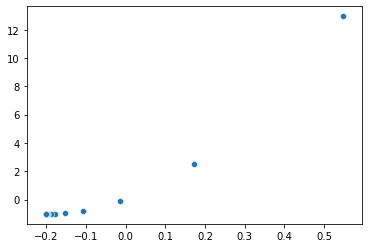

Processing function x * sin(x^2)
lr=0.001, minimum=0.0183, iter count=17653


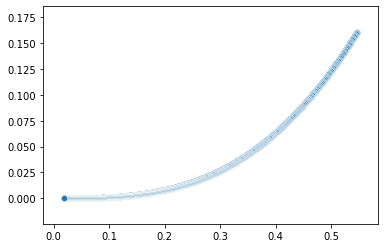

lr=0.005, minimum=0.0082, iter count=8042


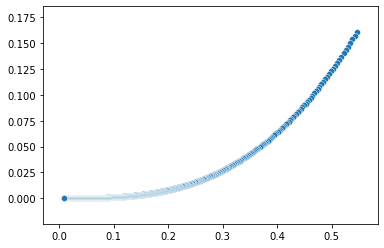

lr=0.01, minimum=0.0058, iter count=5710


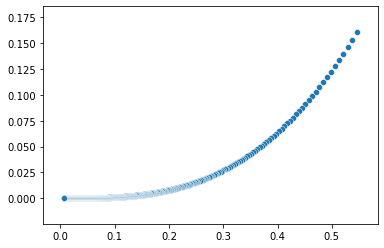

Processing function 10x^2 + 8x - 25
lr=0.001, minimum=-0.4, iter count=489


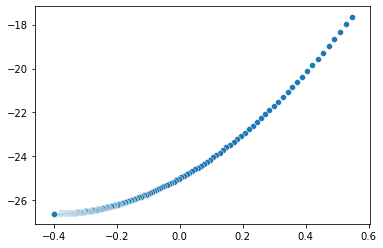

lr=0.005, minimum=-0.4, iter count=110


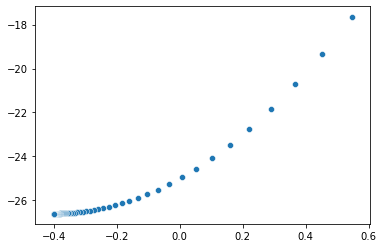

lr=0.01, minimum=-0.4, iter count=56


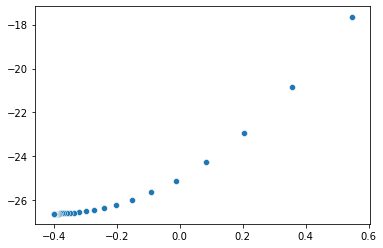

In [8]:
for function, derivative, function_name in zip(functions, derivatives, function_names):
    print(f'Processing function {function_name}')
    for lr in [0.001, 0.005, 0.01]:
        gd = GradientDescent(function=function,
                             derivative=derivative,
                             iterations=100000,
                             initial_point=np.array([initial_point]),
                             epsilon=1e-6,
                             scheduler=ConstLRScheduler(lr))
        answer, iterations_count = gd.optimize()
        print(f'lr={lr}, minimum={round(answer[0], 4)}, iter count={iterations_count}')
        gd.plot_trace()
    print('====================================')